<a href="https://colab.research.google.com/github/JSJeong-me/YOLOv5_Practitioner_Guide_2/blob/main/0-YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |████████████████████████████████| 596 kB 7.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-11-16 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)




requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [14]:
img = cv2.imread('traffic-signal-1.jpg')[..., ::-1]

In [ ]:
cv2_imshow(img)

In [18]:
model.classes=[9]

In [23]:
model.conf = 0.8

In [24]:
results = model(img, size=920)

In [20]:
results.save()

Saved 1 image to runs/detect/exp3


In [25]:
crops_image = results.pandas().xyxy[0]

In [26]:
crops_image

,xmin,ymin,xmax,ymax,confidence,class,name
0,259.913788,41.088364,359.482758,256.713348,0.844238,9,traffic light
1,839.870667,46.503235,942.025879,266.896545,0.841309,9,traffic light


In [27]:
results.pandas().xyxy[0].sort_values('xmin')

,xmin,ymin,xmax,ymax,confidence,class,name
0,259.913788,41.088364,359.482758,256.713348,0.844238,9,traffic light
1,839.870667,46.503235,942.025879,266.896545,0.841309,9,traffic light


In [28]:
x1, y1, x2, y2 = int(crops_image.iloc[1,0]), int(crops_image.iloc[1,1]), int(crops_image.iloc[1,2]), int(crops_image.iloc[1,3])

In [30]:
signals = img[y1:y2, x1:x2]

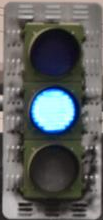

In [31]:
cv2_imshow(signals)